# Please type your student ID:1081447

# Test 1 2023-04-26

In [63]:
#先導入資料處理會用到的模組
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

# 可視化模組
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機器學習模組
import sklearn

# 表示到小數第三位
%precision 3

from sklearn import linear_model
#生成線性回歸模型
reg = linear_model.LinearRegression()

In [64]:
csv_data = pd.read_csv('dataset-1.csv', sep = ',')
csv_data.head(5)

,AirPressure(hPa),Temperature(℃),Windspeed(m/s),Rainfall(mm),Precipitation_days(day),Maximum_daily_precipitation(mm),Relative_Humidity(%),Electricity_generation
0,1019.3,15.1,2.9,33.5,1,33.5,74,48614
1,1021.1,15.0,3.0,42.0,6,26.0,73,54842
2,1016.6,16.3,3.3,22.5,5,8.0,77,49723
3,1015.5,19.7,2.9,49.0,3,39.5,71,55121
4,1007.8,24.7,2.8,72.0,11,27.0,84,54388


In [65]:
X = csv_data.drop('Electricity_generation', axis = 1)

Y = csv_data['Electricity_generation']

# DW value for each factor

In [66]:
import statsmodels.api as sm

# fit the model
model = sm.OLS(Y, X).fit()

# calculate Durbin-Watson statistic
dw = sm.stats.stattools.durbin_watson(model.resid)

# print the statistic
print("Durbin-Watson statistic:", dw)


Durbin-Watson statistic: 1.3658515416512245


# The standardized residual values vs fitted values plo

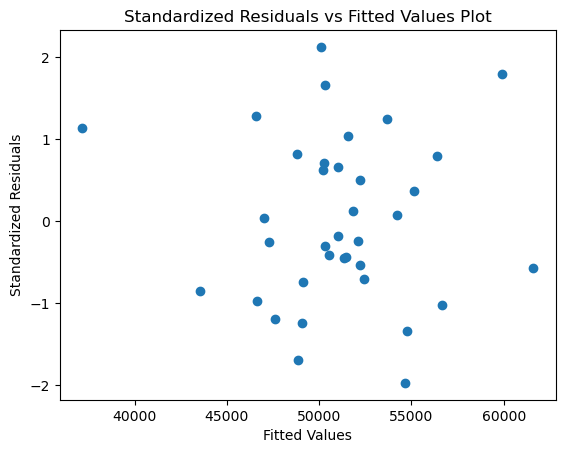

In [67]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# fit a multiple linear regression model
model = sm.OLS(Y, sm.add_constant(X)).fit()

# calculate the standardized residuals
residuals = model.get_influence().resid_studentized_internal

# create a standardized residual values plot
fig, ax = plt.subplots()
ax.scatter(model.fittedvalues, residuals)
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Standardized Residuals')
ax.set_title('Standardized Residuals vs Fitted Values Plot')
plt.show()


# The QQ plot

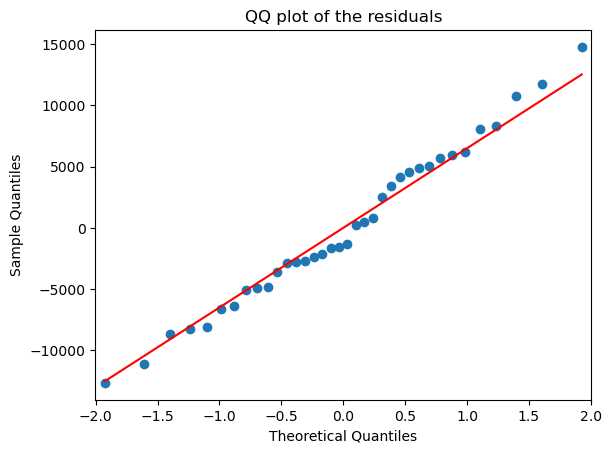

In [68]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# fit a multiple linear regression model
model = sm.OLS(Y, sm.add_constant(X)).fit()

# calculate the residuals
residuals = model.resid

# create a QQ plot of the residuals
fig, ax = plt.subplots()
sm.qqplot(residuals, ax=ax, line='s')
ax.set_title("QQ plot of the residuals")
plt.show()